## **Tugas Besar Data Mining (A)**

# 1. Introduction

## a. Project Overview

1. Latar belakang

Diabetes adalah kondisi di mana kandungan gula dalam darah melebihi normal dan cenderung tinggi. Diabetes mellitus merupakan salah satu penyakit metabolisme yang mampu menyerang siapa saja. Diabetes mellitus (atau kencing manis) adalah kondisi kronis dan berlangsung seumur hidup yang mempengaruhi kemampuan tubuh dalam menggunakan energi yang dari makanan. Ada dua jenis utama dari penyakit ini: Tipe 1 dan Tipe 2.

Sebanyak 350 juta orang di seluruh dunia mengidap diabetes. Pada tahun 2004, sekitar 3-4 juta orang meninggal karena kadar gula darah yang tinggi. Lebih dari 80% kematian akibat penyakit DM terjadi di negara dengan tingkat penghasilan menengah dan rendah. WHO memperkirakan jumlah kematian akibat DM akan meningkat dua kali lipat selama periode 2005 – 2030.


2. Data yang digunakan

Kumpulan data ini berasal dari Institut Nasional Diabetes dan Pencernaan dan Ginjal Penyakit. Tujuan dari dataset ini adalah untuk mengetahui umur berapa yang rentan terjangkit diabetes, berdasarkan pengukuran diagnostic pada dataset tersebut. Beberapa kendala ditempatkan pada pemilihan sampel dari database yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan dengan umur mulai 21 tahun dari Pima Indian heritage.2
Dari kumpulan data pada File (.csv) kita dapat menemukan beberapa variabel, beberapa di antaranya adalah independent (beberapa dari variabel prediktor medis) dan hanya satu target variabel terikat (Hasil).


3. Objective yang ingin dicapai

Dalam penelitian ini kami memprediksi dari kumpulan data diabetes untuk mempresdiksi pada umur berapakah seseorang rentan terkena diabetes.

Data ini memiliki 9 atribut.
Attribute Information:
1. Pregnancies: Untuk menyatakan Jumlah kehamilan
2. Glucose: Untuk menyatakan kadar Glukosa dalam darah
3. BloodPressure: Untuk menyatakan pengukuran tekanan darah
4. SkinThickness: Untuk mengekspresikan ketebalan kulit
5. Insulin: Untuk mengekspresikan tingkat Insulin dalam darah
6. BMI: Untuk menyatakan indeks massa tubuh
7. DiabetesPedigreeFunction: Untuk menyatakan persentase Diabetes
8. Age: Untuk menyatakan umur
9. Outcome: Untuk menyatakan hasil akhir 1 adalah Ya dan 0 adalah Tidak

# 2. Import Library

In [15]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [36]:
data_set= pd.read_csv('diabetes1.csv')
data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 3. Data Loading

In [37]:
# menampilkan 5 data pertama
data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data_set.shape

(768, 9)

In [39]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 4. Data Cleaning

## a. Missing Value

In [40]:
data_set.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tidak terdapat missing value pada dataset

## b. Duplikasi data

In [41]:
data_set.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [42]:
data_set.duplicated().sum()

0

Dapat terlihat bahwa tidak terdapat duplikasi data dalam dataset.

# 5. Data Exploration

In [43]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: title={'center': 'Correlation Heatmap of Diabetes Dataset'}>

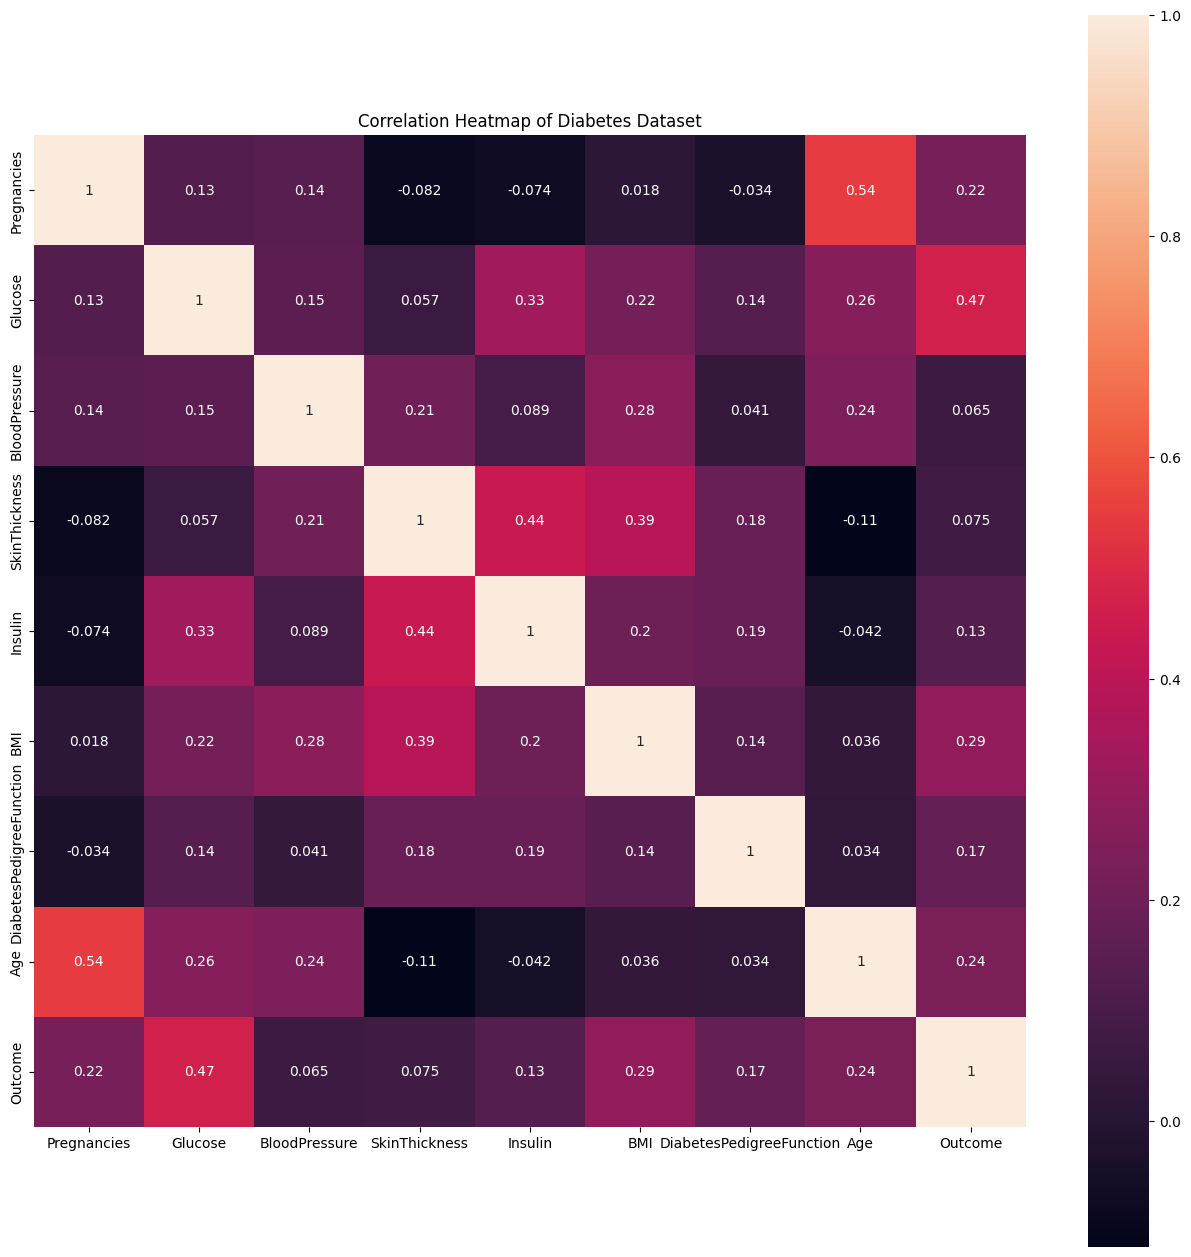

In [44]:
fig, ax = mtp.subplots()
mtp.title('Correlation Heatmap of Diabetes Dataset')
fig.set_size_inches((16,16))
sns.heatmap(data_set.corr(), square = True, annot = True)

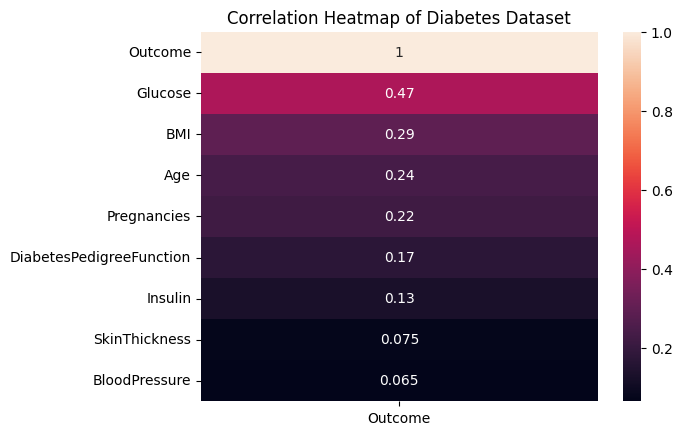

In [45]:
sns.heatmap(data_set.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), annot = True)
mtp.title('Correlation Heatmap of Diabetes Dataset')
mtp.show()

Dapat terlihat pada tabel di atas bahwa variabel yang memiliki korelasi cukup tinggi terhadap variabel Outcome adalah Glucose sedangkan variabel yang memiliki korelasi sangat rendah terhadap variabel Outcome adalah BloodPressure.

# 6. Feature Selection

In [46]:
x= data_set.iloc[:, 7].values
y= data_set.iloc[:, -1].values

In [47]:
print(x)

[50 31 32 21 33 30 26 29 53 54 30 34 57 59 51 32 31 31 33 32 27 50 41 29
 51 41 43 22 57 38 60 28 22 28 45 33 35 46 27 56 26 37 48 54 40 25 29 22
 31 24 22 26 30 58 42 21 41 31 44 22 21 39 36 24 42 32 38 54 25 27 28 26
 42 23 22 22 41 27 26 24 22 22 36 22 37 27 45 26 43 24 21 34 42 60 21 40
 24 22 23 31 33 22 21 24 27 21 27 37 25 24 24 46 23 25 39 61 38 25 22 21
 25 24 23 69 23 26 30 23 40 62 33 33 30 39 26 31 21 22 29 28 55 38 22 42
 23 21 41 34 65 22 24 37 42 23 43 36 21 23 22 47 36 45 27 21 32 41 22 34
 29 29 36 29 25 23 33 36 42 26 47 37 32 23 21 27 40 41 60 33 31 25 21 40
 36 40 42 29 21 23 26 29 21 28 32 27 55 27 57 52 21 41 25 24 60 24 36 38
 25 32 32 41 21 66 37 61 26 22 26 24 31 24 22 46 22 29 23 26 51 23 32 27
 21 22 22 33 29 49 41 23 34 23 42 27 24 25 44 21 30 25 24 51 34 27 24 63
 35 43 25 24 21 28 38 21 40 21 52 25 29 23 57 22 28 39 37 47 52 51 34 29
 26 33 21 25 31 24 65 28 29 24 46 58 30 25 35 28 37 29 47 21 25 30 41 22
 27 25 43 26 30 29 28 59 31 25 36 43 21 24 30 37 23

In [48]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [49]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [50]:
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# 7. Modeling & Evaluation

## a. Modeling Linear Regression

In [51]:
#Fitting the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [52]:
#Prediction of Test and Training set result
y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)

## b. Evaluation

In [53]:
from sklearn.metrics import mean_absolute_error
# memprediksi model dengan test set
pred = regressor.predict(x_test)

# mengevaluasi model dengan MAE
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.42668661366885147


In [54]:
regressor.score(x_test,y_test)

0.04060851000525778

# 8. Visualization

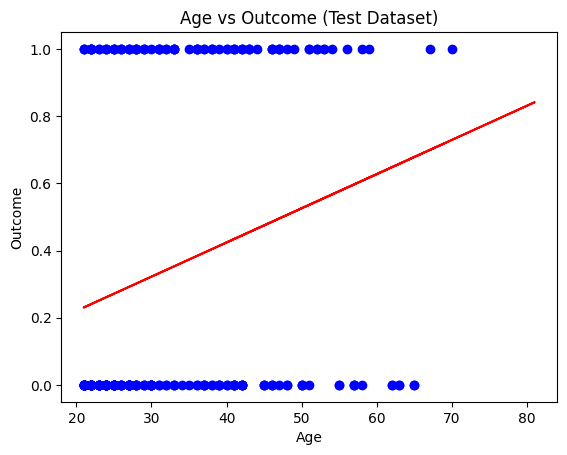

In [55]:
#visualizing the Test set results
mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Age vs Outcome (Test Dataset)")
mtp.xlabel("Age")
mtp.ylabel("Outcome")
mtp.show()

Dari grafik di atas dapat disimpulkan bahwa semakin tua umur maka semakin tinggi kemungkinan terjangkit penyakit diabetes. Namun tidak menutup kemungkinan bahwa umur muda pun dapat terjangkit penyakit diabetes.

In [56]:
def segment_age(x):
    segment = ''
    if x["Age"] >= 21 and x["Age"] < 40:
        segment = "Young Adults [21,40)"
    elif x["Age"] >= 40 and x["Age"] < 60:
        segment = "Middle Adults [40,60)"
    elif x["Age"] >= 60 and x["Age"] <= 81:
        segment = "Old Adults [60,81)"
    return segment

data_set["Age"] = data_set.apply(lambda x : segment_age(x), axis=1)

<ipython-input-57-d5003fc94c2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data_set["Age"], palette="mako")


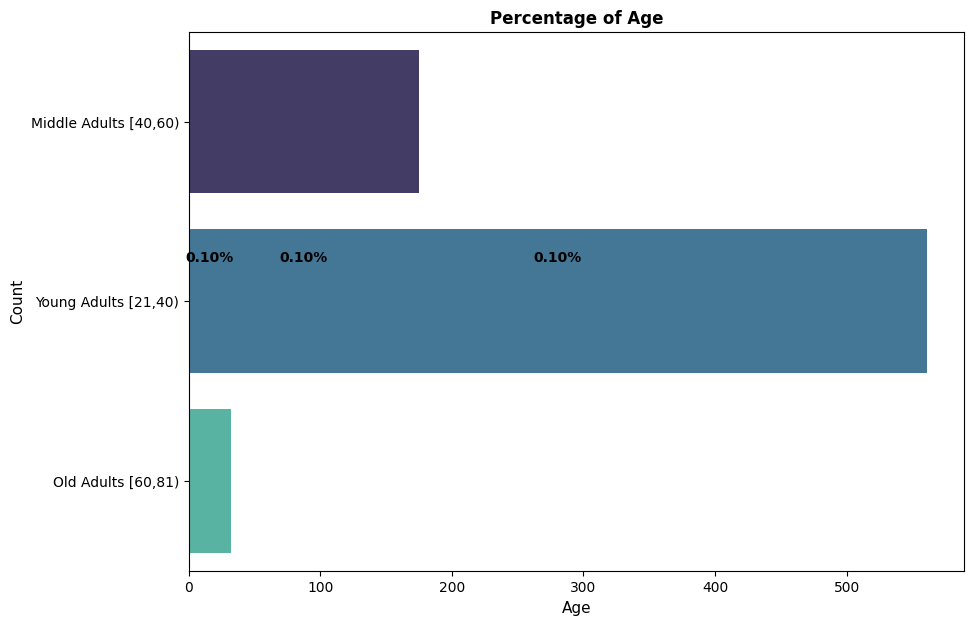

In [57]:
mtp.figure(figsize=(10,7))
mtp.title("Percentage of Age", fontsize = 12,fontweight="bold")
ax=sns.countplot(data_set["Age"], palette="mako")
mtp.xlabel("Age", fontsize = 11)
mtp.ylabel("Count", fontsize = 11)
total=len(data_set)
for p in ax.patches:
        ax.annotate(f'{100 * p.get_height() / total:.2f}%\n', (p.get_x() + p.get_width() / 2,p.get_height()),ha='center', va='center',weight='bold')

In [58]:
diabetes_by_Glucose = pd.pivot_table(data_set, values='Glucose', index='Age', columns='Outcome', aggfunc=len).fillna(0.0)
diabetes_by_Glucose.columns = ['Not Diabetes', 'Diabetes']

In [59]:
diabetes_by_Glucose

,Not Diabetes,Diabetes
Age,,
"Middle Adults [40,60)",76,99
"Old Adults [60,81)",23,9
"Young Adults [21,40)",401,160


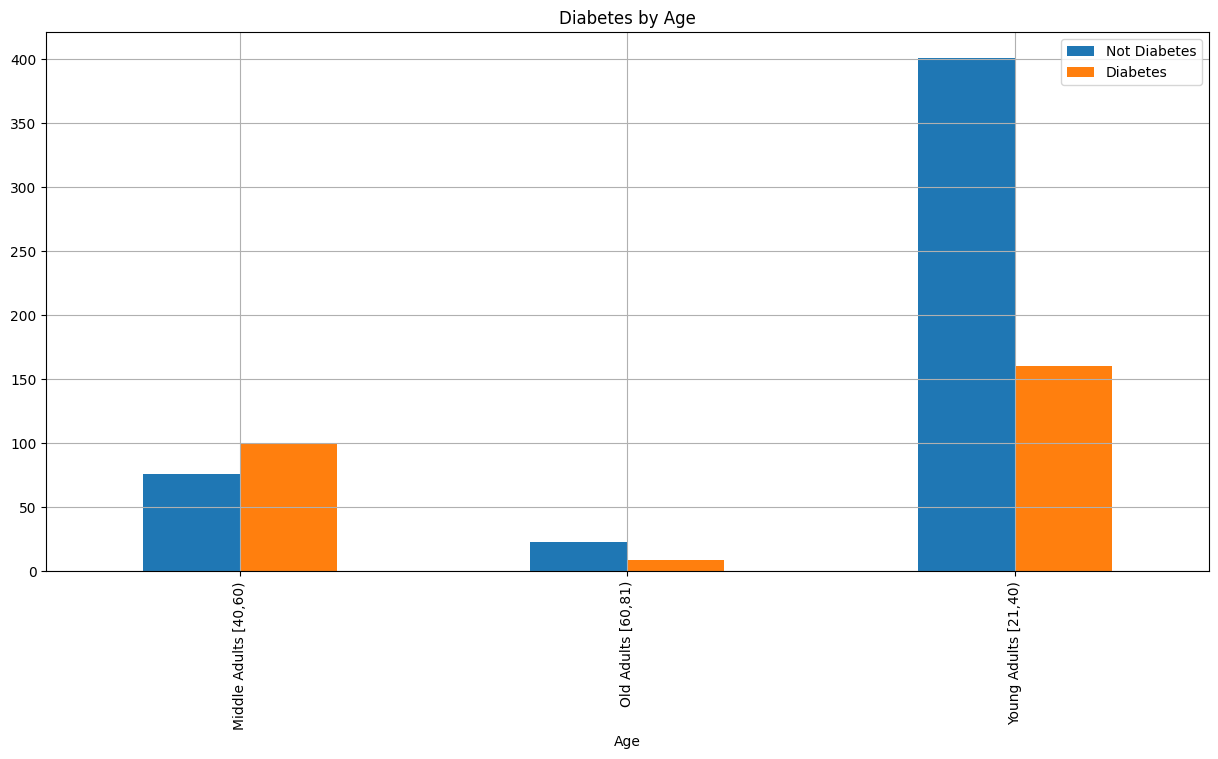

In [60]:
diabetes_by_Glucose.plot(
    kind='bar',
    figsize=(15, 7),
    title='Diabetes by Age',
    grid=True,
)

mtp.show()

<ipython-input-62-ef4d776632f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data_set["Outcome"], palette="mako")


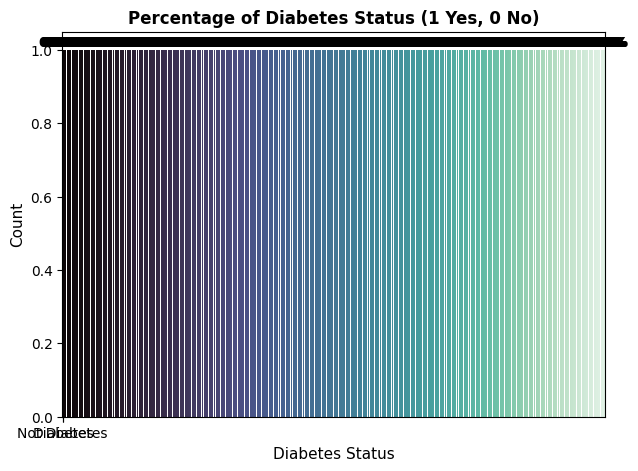

In [62]:
mtp.figure(figsize=(7,5))
mtp.title("Percentage of Diabetes Status (1 Yes, 0 No)", fontsize = 12,fontweight="bold")
ax=sns.countplot(data_set["Outcome"], palette="mako")
mtp.xlabel("Diabetes Status", fontsize = 11)
mtp.ylabel("Count", fontsize = 11)
mtp.xticks(ticks=[0, 1], labels=['Not Diabetes', 'Diabetes'])
total=len(data_set)
for p in ax.patches:
        ax.annotate(f'{100 * p.get_height() / total:.2f}%\n', (p.get_x() + p.get_width() / 2,p.get_height()),ha='center', va='center',weight='bold')

Author: **HusseinAlma**

Anggota Kelompok:

1. Roes Byandra Arivieano
2. Fathul Arifin
3. Juwita Margaretta



